In [1]:
import rootutils
from pathlib import Path

rootutils.setup_root(Path.cwd(), indicator=".project-root", pythonpath=True)
import numpy as np
from src.viaABC.systems import LotkaVolterra
from src.models.lightning_module import PreTrainLightning
from src.models.components.models import TSMVAE
import torch

from src.utils.inference_utils import load_pretrained_model

/home/jp4474/viaABC/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = load_pretrained_model(
    model_class=TSMVAE,
    lightning_class=PreTrainLightning,
    checkpoint_substr="TSMVAE",
    folder_name='./',)

Successfully loaded model


In [3]:
lotka_abc = LotkaVolterra(model=model, pooling_method='no_cls',)

INFO:src.viaABC.viaABC:Initializing viaABC class
INFO:src.viaABC.viaABC:Model updated
INFO:src.viaABC.viaABC:viaABC class initialized with the following parameters:
INFO:src.viaABC.viaABC:num_parameters: 2
INFO:src.viaABC.viaABC:Mu: [0 0]
INFO:src.viaABC.viaABC:Sigma: [10 10]
INFO:src.viaABC.viaABC:t0: 0
INFO:src.viaABC.viaABC:tmax: 15
INFO:src.viaABC.viaABC:time_space: [ 1.1  2.4  3.9  5.6  7.5  9.6 11.9 14.4]
INFO:src.viaABC.viaABC:pooling_method: no_cls
INFO:src.viaABC.viaABC:metric: pairwise_cosine


In [5]:
observational_data = lotka_abc.raw_observational_data

In [6]:
observational_data

array([[1.87, 0.49],
       [0.65, 2.62],
       [0.22, 1.54],
       [0.31, 0.02],
       [1.64, 1.14],
       [1.15, 1.68],
       [0.24, 1.07],
       [2.91, 0.88]])

In [7]:
with torch.no_grad():
    pred = model(torch.from_numpy(observational_data).float().unsqueeze(0).to(model.device))[-1].squeeze(0).cpu().numpy()

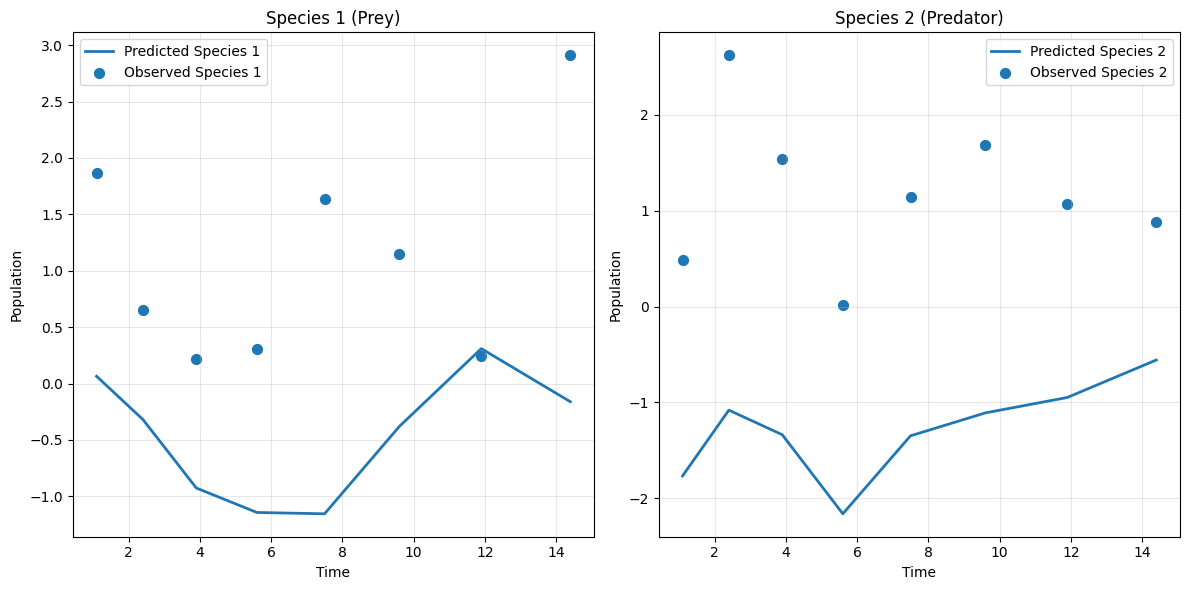

In [8]:
# plot pred as lines, observational_data as points
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot both species (variables) separately
plt.subplot(1, 2, 1)
plt.plot(lotka_abc.time_space, pred[:, 0], label='Predicted Species 1', linewidth=2)
plt.scatter(lotka_abc.time_space, observational_data[:, 0], label='Observed Species 1', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Species 1 (Prey)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(lotka_abc.time_space, pred[:, 1], label='Predicted Species 2', linewidth=2)
plt.scatter(lotka_abc.time_space, observational_data[:, 1], label='Observed Species 2', s=50)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Species 2 (Predator)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
lotka_abc.run(num_particles=250, k=10, q_threshold=0.999)

INFO:src.viaABC.viaABC:Starting viaABC run with Q Threshold: 0.999
INFO:src.viaABC.viaABC:Initialization (generation 0) started


KeyboardInterrupt: 